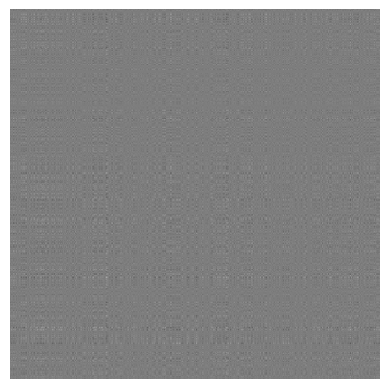

In [1]:
from utils.data_generation import create_rank_k_dataset
from matplotlib import pyplot as plt
import numpy as np

M, M_incomplete, omega, mask_array= create_rank_k_dataset(n_rows=1000, n_cols=1000, k=3, gaussian=True)
plt.axis('off')
plt.imshow(M, cmap='gray')

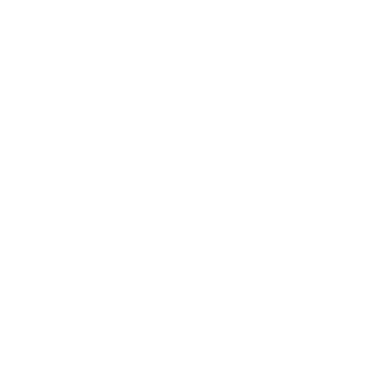

In [2]:
plt.axis('off')
plt.imshow(M_incomplete, cmap='gray')
missing_mask = ~mask_array.astype(bool)

In [5]:
%%time
from src.css_matrix_completion.transform import cx, ls
from src.css_matrix_completion.cssmc import CSSMC
from src.css_matrix_completion.css import uniform
from src.css_matrix_completion.mc import svt

#TODO svt
# proste przyrostowe
solver = CSSMC(col_number=250, transform=cx, col_select=uniform, fill_method='zero', solve=svt)
M_filled, cols_idx = solver.fit_transform(M_incomplete)
print(f"rmse {np.linalg.norm(M_filled - M)/np.linalg.norm(M)}")
print(f"rmse_omega {np.linalg.norm(M_filled[missing_mask]- M[missing_mask])/np.linalg.norm(M[missing_mask])}")
print(f"mae_omega {np.mean(np.abs(M_filled[missing_mask]- M[missing_mask]))}")

2022-10-19 21:43:34.341247: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-19 21:43:34.608342: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-10-19 21:43:34.615620: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-19 21:43:34.615642: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

NameError: name 'ok_mask' is not defined

In [4]:
print(f"rmse {np.linalg.norm(M_filled - M)/np.linalg.norm(M)}")
print(f"rmse_omega {np.linalg.norm(M_filled[missing_mask]- M[missing_mask])/np.linalg.norm(M[missing_mask])}")
print(f"mae_omega {np.mean(np.abs(M_filled[missing_mask]- M[missing_mask]))}")

rmse 6.452266887787438
rmse_omega 7.719516307180621
mae_omega 2.8640425733690846


In [5]:
print(f"rmse {np.linalg.norm(M_filled[:, cols_idx] - M[:, cols_idx])/np.linalg.norm(M[:, cols_idx])}")

rmse 0.8866397921095345


In [6]:
from fancyimpute import NuclearNormMinimization
missing_mask = ~mask_array.astype(bool)
M_incomplete[missing_mask] = np.nan
solver = NuclearNormMinimization()
M_filled = solver.fit_transform(M_incomplete)
print(f"rmse {np.linalg.norm(M_filled - M)/np.linalg.norm(M)}")
print(f"rmse_omega {np.linalg.norm(M_filled[missing_mask]- M[missing_mask])/np.linalg.norm(M[missing_mask])}")
print(f"mae_omega {np.mean(np.abs(M_filled[missing_mask]- M[missing_mask]))}")

                                     CVXPY                                     
                                     v1.2.1                                    
(CVXPY) Oct 06 08:44:49 PM: Your problem has 7000 variables, 1 constraints, and 0 parameters.
(CVXPY) Oct 06 08:44:49 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Oct 06 08:44:49 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Oct 06 08:44:49 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Oct 06 08:44:49 PM: Compiling problem (target solver=CVXOPT).
(CVXPY) Oct 06 08:44:49 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffin

KeyboardInterrupt: 

In [7]:
M, M_incomplete, omega, mask_array= create_rank_k_dataset(n_rows=1000, n_cols=1000, k=5, gaussian=True)
cols = uniform(M, 500)
#ok_mask = np.array(~np.isnan(M))
ok_mask = mask_array
C = np.copy(M[:, cols])
ok_mask[:, cols] = True


In [8]:
%%time
X = cx(np.array(M), ok_mask.astype(bool), np.array(C))
np.linalg.norm(X-M)/np.linalg.norm(M)

/home/tosia/NASK/css-matrix-completion/src/css_matrix_completion/transform.py:84: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  Y[i, :] = np.linalg.lstsq(siX, sia)[0]


CPU times: user 1min 45s, sys: 1min 55s, total: 3min 40s
Wall time: 29.3 s


9.747671333742385e-16

In [6]:
cols_idx

array([ 3,  7, 33, 50, 20, 27, 28, 38, 51,  2, 48, 55, 53, 69, 16, 42, 30,
       41, 67, 40, 45, 23, 66, 61, 59, 24,  9,  5, 64, 37, 22, 19, 47, 65,
        4])

In [3]:
%%time
from fancyimpute import SoftImputeWarmStarts, SoftImpute

solver = SoftImpute(shrinkage_value=5*M.shape[1])
M_filled = solver.fit_transform(M_incomplete)

2022-10-19 21:47:06.790321: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-19 21:47:07.057052: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-10-19 21:47:07.063898: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-19 21:47:07.063921: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

[SoftImpute] Max Singular Value of X_init = 313.019787
[SoftImpute] Iter 1: observed MAE=1.239450 rank=0
[SoftImpute] Iter 2: observed MAE=1.239450 rank=0
[SoftImpute] Iter 3: observed MAE=1.239450 rank=0
[SoftImpute] Iter 4: observed MAE=1.239450 rank=0
[SoftImpute] Iter 5: observed MAE=1.239450 rank=0
[SoftImpute] Iter 6: observed MAE=1.239450 rank=0
[SoftImpute] Iter 7: observed MAE=1.239450 rank=0
[SoftImpute] Iter 8: observed MAE=1.239450 rank=0
[SoftImpute] Iter 9: observed MAE=1.239450 rank=0
[SoftImpute] Iter 10: observed MAE=1.239450 rank=0
[SoftImpute] Iter 11: observed MAE=1.239450 rank=0
[SoftImpute] Iter 12: observed MAE=1.239450 rank=0
[SoftImpute] Iter 13: observed MAE=1.239450 rank=0
[SoftImpute] Iter 14: observed MAE=1.239450 rank=0
[SoftImpute] Iter 15: observed MAE=1.239450 rank=0
[SoftImpute] Iter 16: observed MAE=1.239450 rank=0
[SoftImpute] Iter 17: observed MAE=1.239450 rank=0
[SoftImpute] Iter 18: observed MAE=1.239450 rank=0
[SoftImpute] Iter 19: observed MAE=1

In [4]:
np.linalg.norm(M_filled[-1][1]-M)/np.linalg.norm(M)

1.0

In [16]:
np.linalg.matrix_rank(M_filled[-1][1])

1000